In [5]:
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.embeddings import HuggingFaceInstructEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFLoader
import transformers 
from pdf2image import convert_from_path
from transformers import AutoTokenizer, TextStreamer, pipeline
import os
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoModel
import pypdf

In [6]:
poppler_path = r'C:\Users\R Vignesh\Documents\poppler-24.07.0\Library\bin'
meta_images = convert_from_path("pdfs/Meta-03-31-2024-Exhibit-99-1_FINAL.pdf", poppler_path=poppler_path, dpi=88)

In [15]:
nvidia_images = convert_from_path("pdfs/NVIDIAAn.pdf",poppler_path=poppler_path, dpi=88)

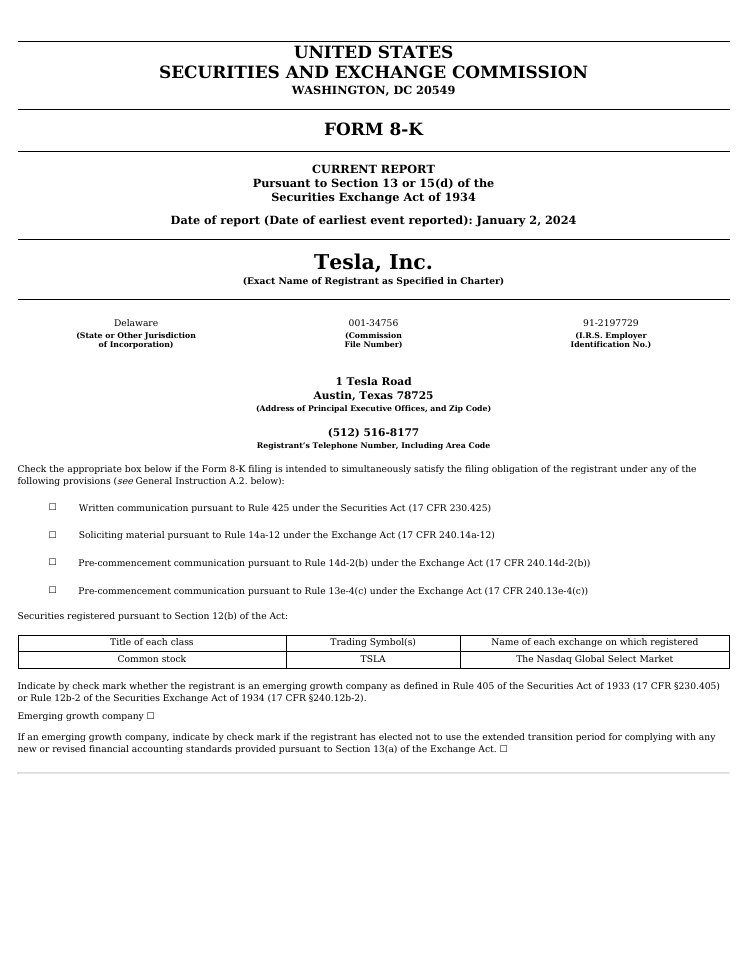

In [16]:
tesla_images = convert_from_path("pdfs/tsla-20240102-gen.pdf",poppler_path=poppler_path, dpi=88)
tesla_images[0]

In [8]:
legal = convert_from_path(r"legal_pdf\act_2_of_1956.pdf",poppler_path=poppler_path, dpi=88)

In [11]:
loader = PyPDFDirectoryLoader("legal_pdf")
docs = loader.load()
len(docs)

599

In [12]:
from langchain_community.embeddings.huggingface import HuggingFaceInstructEmbeddings
from sentence_transformers import SentenceTransformer
from transformers import Trainer, TrainingArguments

In [13]:
from langchain_community.embeddings import HuggingFaceInstructEmbeddings
from InstructorEmbedding import INSTRUCTOR
embeddings= HuggingFaceInstructEmbeddings(model_name = "BAAI/llm-embedder",
model_kwargs = {'device': 'cpu'}, encode_kwargs = {'normalize_embeddings': True})

load INSTRUCTOR_Transformer
max_seq_length  512


In [14]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)
len(texts)


1208

In [15]:
import pydantic
from pydantic import BaseModel, field_validator, model_validator

In [16]:
from langchain_community.vectorstores import DeepLake
from langchain_text_splitters import CharacterTextSplitter

In [17]:
db = DeepLake(dataset_path="./my_deeplake/", embedding=embeddings, overwrite=True)
db.add_documents(docs)

Creating 599 embeddings in 2 batches of size 500:: 100%|██████████| 2/2 [10:34<00:00, 317.02s/it]

Dataset(path='./my_deeplake/', tensors=['text', 'metadata', 'embedding', 'id'])

  tensor      htype      shape      dtype  compression
  -------    -------    -------    -------  ------- 
   text       text      (599, 1)     str     None   
 metadata     json      (599, 1)     str     None   
 embedding  embedding  (599, 768)  float32   None   
    id        text      (599, 1)     str     None   


['f6f5d2cd-53e6-11ef-a4fc-f4a80db964ea',
 'f6f5d2ce-53e6-11ef-bc8a-f4a80db964ea',
 'f6f5d2cf-53e6-11ef-b4e6-f4a80db964ea',
 'f6f5d2d0-53e6-11ef-9f8e-f4a80db964ea',
 'f6f5d2d1-53e6-11ef-9079-f4a80db964ea',
 'f6f5d2d2-53e6-11ef-8d5f-f4a80db964ea',
 'f6f5d2d3-53e6-11ef-bbe5-f4a80db964ea',
 'f6f5d2d4-53e6-11ef-823c-f4a80db964ea',
 'f6f5d2d5-53e6-11ef-81e4-f4a80db964ea',
 'f6f5d2d6-53e6-11ef-baa8-f4a80db964ea',
 'f6f5d2d7-53e6-11ef-830a-f4a80db964ea',
 'f6f5d2d8-53e6-11ef-972a-f4a80db964ea',
 'f6f5d2d9-53e6-11ef-be78-f4a80db964ea',
 'f6f5d2da-53e6-11ef-aa62-f4a80db964ea',
 'f6f5d2db-53e6-11ef-bff1-f4a80db964ea',
 'f6f5d2dc-53e6-11ef-b67f-f4a80db964ea',
 'f6f5d2dd-53e6-11ef-b220-f4a80db964ea',
 'f6f5d2de-53e6-11ef-ae18-f4a80db964ea',
 'f6f5d2df-53e6-11ef-8103-f4a80db964ea',
 'f6f5d2e0-53e6-11ef-8f6b-f4a80db964ea',
 'f6f5d2e1-53e6-11ef-a74b-f4a80db964ea',
 'f6f5d2e2-53e6-11ef-b5a0-f4a80db964ea',
 'f6f5d2e3-53e6-11ef-9e71-f4a80db964ea',
 'f6f5d2e4-53e6-11ef-91ba-f4a80db964ea',
 'f6f5d2e5-53e6-

In [18]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-128k-instruct", trust_remote_code=True)

`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [19]:
DEFAULT_SYSTEM_PROMPT = """
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
""".strip()


def generate_prompt(prompt: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT) -> str:
    return f"""
[INST] <>
{system_prompt}
<>

{prompt} [/INST]
""".strip()

In [20]:
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

In [21]:
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1024,
    temperature=0,
    top_p=0.95,
    repetition_penalty=1.15,
    streamer=streamer,
)

In [22]:
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [23]:
SYSTEM_PROMPT = "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer."

template = generate_prompt(
    """
{context}

Question: {question}
""",
    system_prompt=SYSTEM_PROMPT,
)


In [24]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [25]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

In [26]:
result = qa_chain(" What is the section on Buildings or works commenced contrary to Act may be cut into and laid open for purpose of inspection?")

c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The `seen_tokens

Section 453 states that "If there shall be reasonable ground for suspecting that in the erection of any such building or in the execution of any such work...it is found upon inspecting such building or work..." then certain actions can be taken including requiring demolition or opening parts of noncompliant constructions for further investigation through official notices from authorities like the Commissioner approved by Standing Committees. This ensures compliance checks against legal standards during various stages post completion but before final occupation permissions granted under sections related to certificates issuance mentioned later within Part IVB regarding Building Construction & Maintenance Control Measures.


In [27]:
result = qa_chain("What is section 673?")

c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


I'm sorry, but based on the provided text excerpts from "Schedules" related acts concerning various aspects of constructing and maintaining structures like schools, hospitals, etc., there isn't a mentionable content regarding 'section 673'. The information given doesn’t contain details pertaining this specific reference point within these documents. Therefore, without additional resources beyond what has been shared here, providing accurate detail relating specifically to Section 673 would not feasible.


In [29]:
result = qa_chain("What are the things and the numbers that comes under CONTROL?")

c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\R Vignesh\Documents\Applications and repos\Vizzhy_LLM\.venv\Lib\site-packages\transformers\generation\configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


The control mentioned refers to "one hundred rupees." However, based on your request about specifics regarding what falls under 'Control,' I can infer additional details related to administrative oversight within the framework given but cannot directly extract numerical values associated specifically with Control since they were omitted after "(Number)" next to each item listed before being cut off due to text limitations. Here’s how we might interpret these items generally if more information was available:

The list seems structured around various aspects requiring supervision over buildings and their uses according to Municipal Law provisions outlined above—likely referring sections like Section 440 through Section 447 inclusive considering typical legislative number sequences found between similar acts or regulations. These could include controls relating to construction permissions, usage restrictions outside specified purposes, financial penalties tied to unauthorized changes or 